# Wine Quality

This notebook is an example on how to use the VerticaPy Library. We will use the Wine Quality dataset to predict a specific white wine quality. You can download the Jupyter Notebook of the study by clicking <a href="winequality.ipynb">here</a>. To achieve our goals, we have access to the following data.
<ul>
    <li><b>fixed acidity</b></li>
    <li><b>volatile acidity</b></li>
    <li><b>citric acid</b></li>
    <li><b>residual sugar</b></li>
    <li><b>total sulfur dioxide</b></li>
    <li><b>free sulfur dioxide</b></li>
    <li><b>density</b></li>
    <li><b>pH</b></li>
    <li><b>sulphates</b></li>
    <li><b>alcohol</b></li>
    <li><b>quality (score between 0 and 10)</b></li>
</ul>
We will follow the entire Data Science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) and solve this easy use-case. The purpose is to show you some of the library interesting functionalities.

## Initialization

Let's create a Virtual DataFrame of the dataset.

In [1]:
from verticapy.learn.datasets import load_winequality
winequality = load_winequality()
winequality.head(5)

,free_sulfur_dioxide,density,good,quality,chlorides,alcohol,color,pH,volatile_acidity,citric_acid,fixed_acidity,total_sulfur_dioxide,sulphates,residual_sugar
0,20.0,0.99248,0,6,0.036,12.4,white,3.75,0.31,0.02,3.8,114.0,0.44,11.1
1,29.0,0.989,1,8,0.03,12.8,white,3.57,0.225,0.4,3.9,118.0,0.36,4.2
2,93.0,0.98999,1,7,0.029,12.0,white,3.65,0.17,0.36,4.2,161.0,0.89,1.8
3,64.0,0.99688,0,3,0.041,8.0,white,3.42,0.215,0.23,4.2,157.0,0.44,5.1
4,31.0,0.98904,1,8,0.03,12.8,white,3.46,0.32,0.39,4.4,127.0,0.36,4.3
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: winequality, Number of rows: 6497, Number of columns: 14

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

In [2]:
winequality.describe()

,count,mean,std,min,25%,50%,75%,max,unique
alcohol,6497,10.4918008311529,1.192711748871,8.0,9.5,10.3,11.3,14.9,112.0
chlorides,6497,0.0560338617823611,0.0350336013724591,0.0090,0.038,0.047,0.065,0.611,241.0
citric_acid,6497,0.318633215330153,0.145317864897591,0.0,0.25,0.31,0.39,1.66,89.0
density,6497,0.994696633831,0.00299867300371915,0.98711,0.99234,0.99489,0.99699,1.03898,1103.0
fixed_acidity,6497,7.21530706479914,1.29643375779982,3.8,6.4,7.0,7.7,15.9,106.0
free_sulfur_dioxide,6497,30.5253193781746,17.7493997720025,1.0,17.0,29.0,41.0,289.0,135.0
good,6497,0.19655225488687,0.397421408895367,0.0,0.0,0.0,0.0,1.0,2.0
pH,6497,3.21850084654456,0.160787202103987,2.72,3.11,3.21,3.32,4.01,108.0
quality,6497,5.81837771279051,0.873255271531123,3.0,5.0,6.0,6.0,9.0,7.0
residual_sugar,6497,5.44323533938742,4.75780374314741,0.6,1.8,3.0,8.1,65.8,316.0


<object>

The quality of a wine is based on an equilibrium between the components:
 - For red wines: tannin/smoothness/acidity
 - For white wines: smoothness/acidity
 
It is obvious that we lack of data to create a good model (the tannins weren't extracted). We must reduce the study to white wines.

In [3]:
winequality.filter("color = 'white'").drop(["good", "color"])

1599 element(s) was/were filtered


,free_sulfur_dioxide,density,quality,chlorides,alcohol,pH,volatile_acidity,citric_acid,fixed_acidity,total_sulfur_dioxide,sulphates,residual_sugar
0,20.0,0.99248,6,0.036,12.4,3.75,0.31,0.02,3.8,114.0,0.44,11.1
1,29.0,0.989,8,0.03,12.8,3.57,0.225,0.4,3.9,118.0,0.36,4.2
2,93.0,0.98999,7,0.029,12.0,3.65,0.17,0.36,4.2,161.0,0.89,1.8
3,64.0,0.99688,3,0.041,8.0,3.42,0.215,0.23,4.2,157.0,0.44,5.1
4,31.0,0.98904,8,0.03,12.8,3.46,0.32,0.39,4.4,127.0,0.36,4.3
,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: winequality, Number of rows: 4898, Number of columns: 12

Let's draw the correlation matrix of the dataset.

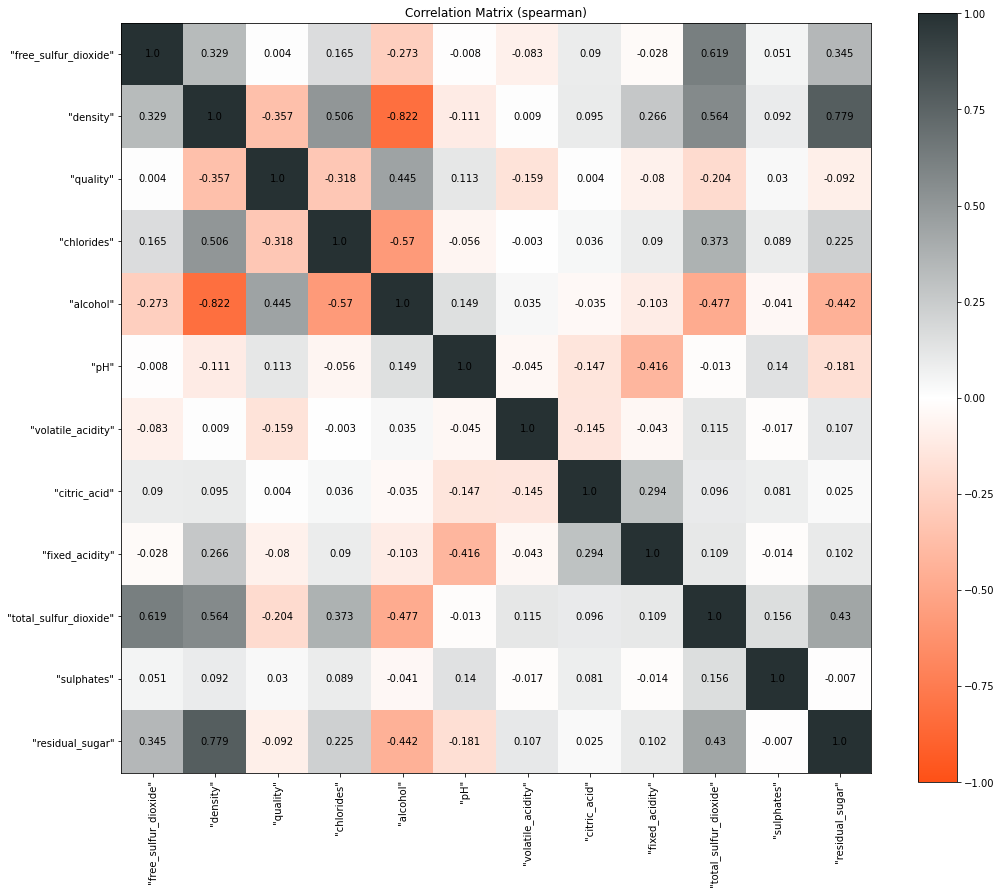

In [4]:
%matplotlib inline
x = winequality.corr(method = "spearman")

We can see a high correlation between the density and the alcohol degree. The alcohol degree is the density of pure ethanol in the wine. We can drop the 'density' column which can not really influence the white wine quality and which is adding bias in the data.

In [5]:
winequality.drop(["density"])

,free_sulfur_dioxide,quality,chlorides,alcohol,pH,volatile_acidity,citric_acid,fixed_acidity,total_sulfur_dioxide,sulphates,residual_sugar
0,20.0,6,0.036,12.4,3.75,0.31,0.02,3.8,114.0,0.44,11.1
1,29.0,8,0.03,12.8,3.57,0.225,0.4,3.9,118.0,0.36,4.2
2,93.0,7,0.029,12.0,3.65,0.17,0.36,4.2,161.0,0.89,1.8
3,64.0,3,0.041,8.0,3.42,0.215,0.23,4.2,157.0,0.44,5.1
4,31.0,8,0.03,12.8,3.46,0.32,0.39,4.4,127.0,0.36,4.3
,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: winequality, Number of rows: 4898, Number of columns: 11

As we are facing wine tasters score, it is highly probable that two wines having a close composition will get almost the same score. With this logic KNN will be a very good model for this study. However KNN is sensible to un-normalized data. We must normalize the data before applying the model.

In [6]:
winequality.normalize(["free_sulfur_dioxide", 
                       "residual_sugar", 
                       "pH", 
                       "sulphates", 
                       "volatile_acidity", 
                       "fixed_acidity",
                       "citric_acid",
                       "chlorides",
                       "total_sulfur_dioxide",
                       "alcohol"],
                      method = "robust_zscore")

,free_sulfur_dioxide,quality,chlorides,alcohol,pH,volatile_acidity,citric_acid,fixed_acidity,total_sulfur_dioxide,sulphates,residual_sugar
0,-0.858442784788394,6,-0.674490759476594,1.34898151895319,3.844597329016592,0.562075632897163,-3.372453797382976,-4.046944556859571,-0.465166041018341,-0.289067468347112,1.1054154113644201
1,-0.306586708852998,8,-1.25262569617082,1.61877782274383,2.630513961958721,-0.393452943028014,0.89932101263546,-3.912046404964252,-0.372132832814673,-1.059914050606078,-0.18735854429905424
2,3.617723164465374,7,-1.34898151895319,1.07918521516255,3.170106569539997,-1.011736139214893,0.44966050631773,-3.507351949278295,0.627974155374761,4.046944556859571,-0.6370190506167844
3,1.839520253117987,3,-0.192711645564741,-1.61877782274383,1.618777822743828,-0.505868069607446,-1.011736139214893,-3.507351949278295,0.534940947171093,-0.289067468347112,-0.018735854429905423
4,-0.183952025311799,8,-1.25262569617082,1.61877782274383,1.888574126534466,0.674490759476595,0.786905886056028,-3.237555645487657,-0.16280811435642,-1.059914050606078,-0.16862268986914883
,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: winequality, Number of rows: 4898, Number of columns: 11

We can save the view in the DB.

In [7]:
from verticapy.utilities import drop_view
drop_view("winequality_clean")
x = winequality.to_db("winequality_clean")

The view winequality_clean was successfully dropped.


## Machine Learning

Let's create our KNN model.

In [8]:
from verticapy.learn.neighbors import KNeighborsRegressor
from verticapy.learn.model_selection import cross_validate

predictors = winequality.get_columns()
predictors.remove('"quality"')
response = "quality"
relation = "winequality_clean"
model = KNeighborsRegressor(n_neighbors = 50)
cross_validate(model, relation, predictors, response)

,explained_variance,max_error,median_absolute_error,mean_absolute_error,mean_squared_error,r2
1-fold,0.325745861757198,3.16,0.48,0.588485576923077,0.561825961538462,0.325099454921234
2-fold,0.311691941866353,3.24,0.46,0.579228915662651,0.545773493975904,0.309035432338297
3-fold,0.31585195263637,3.42,0.44,0.552058449809403,0.499279542566709,0.313234596744588
avg,0.31776325208664036,3.2733333333333334,0.46,0.5732576474650437,0.5356263326936916,0.315789828001373
std,0.00721927733682706,0.13316656236958774,0.01999999999999999,0.018933460601663888,0.03248441615779693,0.008331273040059107


<object>

The model is not bad at all. We are predicting a score with a median absolute error of less than 0.5. To create a better one, we must probably create more relevant features.

## Conclusion

We have solved this use-case in a pandas-like way but we never loaded the data in memory. This example showed an overview of the library. You can now start your own project by looking at the documentation first.